In [1]:
!pip install pyCalor

  Using cached pycalor-1.0.7-py3-none-any.whl.metadata (3.6 kB)
  Using cached coolprop-7.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (282 bytes)
  Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached pycalor-1.0.7-py3-none-any.whl (22 kB)
Using cached coolprop-7.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.8 MB)
Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pyCalor]m2/4 [igraph]p]


In [2]:
from pyCalor import thermo as th

# Turbine

A steam turbine operates with the conditions listed below. Determine the shaft power and the total power transferred from the system. 

In [31]:
mdot_kgPerHr = 4600

# state 1
p1_bar = 60
T1_C = 400
# w1_mPerS = 10

# state 2
p2_bar = 0.2
x2 = 0.9
# w2_mPerS = 50

Conversions:

In [18]:
mdot_kgPerS = mdot_kgPerHr/(60*60)

## Properties:

In [25]:
st1 = th.state('water',T=(T1_C,'C'),p=(p1_bar,'bar'),name='1')

In [26]:
print(st1.u)

2893.7510952518414


In [27]:
print(st1.h)

3178.273140329883


In [11]:
st2 = th.state('water',x=x2,p=(p2_bar,'bar'),name='2')

In [28]:
print(st2.u)

2235.5193337835526


In [29]:
print(st2.h)

2373.184510788441


In [12]:
pr = th.process([(st1,st2)])

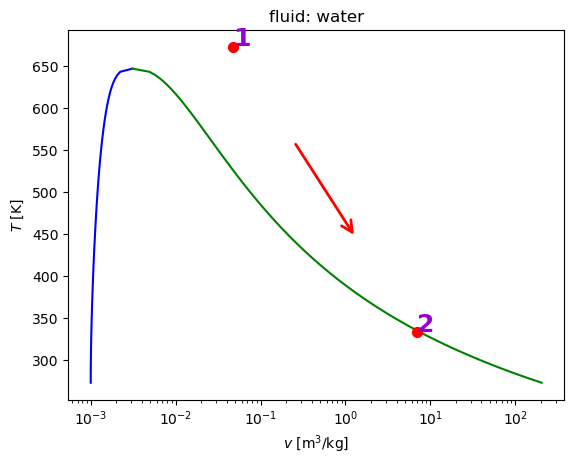

In [16]:
pr.plot('Tv')

The shaft work is:

$$ \dot{W}_\text{S,out} = \dot{m} \left(h_1 - h_2 \right)$$

In [32]:
W_shaft_out_kW = mdot_kgPerS*(1000*(st1.h-st2.h)); print(W_shaft_out_kW)

1028724.3599696202


The overall work transferred out is:

$$ \dot{W}_\text{net,out} = \dot{m} (u_1 - u_2)$$

In [24]:
W_total_out_kW = mdot_kgPerS*(st1.u-st2.u); print(W_total_out_kW)

841.0739174317023


What we see from this is that:

$$ \dot{W}_\text{S,out} \ne \dot{W}_\text{net,out} $$